In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/deepfake.zip" -d "/content/deepfake"


Archive:  /content/drive/MyDrive/deepfake.zip
   creating: /content/deepfake/deepfake/
   creating: /content/deepfake/deepfake/fake/
  inflating: /content/deepfake/deepfake/fake/easy_100_1111.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_101_0010.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_102_0101.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_103_1111.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_104_1000.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_105_1100.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_106_0011.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_107_1011.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_108_1111.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_109_1111.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_10_0001.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_110_0001.jpg  
  inflating: /content/deepfake/deepfake/fake/easy_111_1101.jpg  
  inflating: /content/d

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    '/content/deepfake/deepfake',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    '/content/deepfake/deepfake',
    target_size=(224, 224),
    class_mode='binary',
    batch_size=32,
    subset='validation',
    shuffle=False
)


Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 202s 4s/step - accuracy: 0.5158 - loss: 5.4815 - val_accuracy: 0.4706 - val_loss: 2.7842
Epoch 2/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 196s 4s/step - accuracy: 0.5449 - loss: 1.4310 - val_accuracy: 0.5294 - val_loss: 3.6725
Epoch 3/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.5236 - loss: 1.6601 - val_accuracy: 0.5294 - val_loss: 1.7138
Epoch 4/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.5072 - loss: 1.4146 - val_accuracy: 0.5245 - val_loss: 1.4796
Epoch 5/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.5603 - loss: 0.9677 - val_accuracy: 0.5417 - val_loss: 2.7737
Epoch 6/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.5179 - loss: 0.7886 - val_accuracy: 0.5319 - val_loss: 2.7520
Epoch 7/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.5263 - loss: 0.8134 - val_accuracy: 0.5319 - val_loss: 0.9009
Epoch 8/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.5478 - loss: 0.7304 - val_accuracy: 0.5441 - v

In [ ]:
model.evaluate(val_gen)
model.save("deepfake_detector_model.h5")


13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.4252 - loss: 1.0218


In [45]:
from PIL import Image
import numpy as np

def preprocess_image(image_path):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

img = preprocess_image("/content/drive/MyDrive/pexels-pixabay-415829.jpg")
pred = model.predict(img)
pred_class = int(pred[0][0] > 0.5)

class_names = ['Real', 'Fake']
print(f"Prediction: {class_names[pred_class]} ({pred[0][0]:.4f} confidence)")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Prediction: Real (0.4650 confidence)


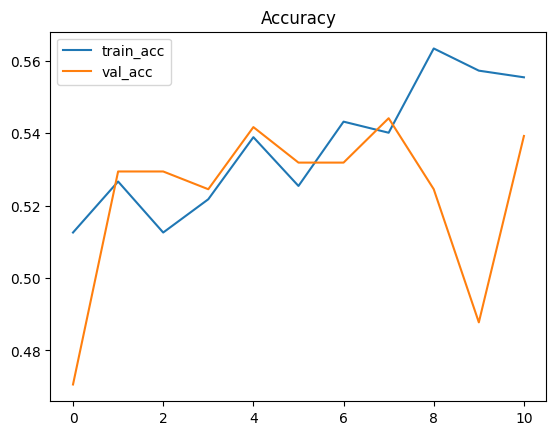

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')
plt.show()


In [40]:
model.save("deepfake_detector.h5")


In [42]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

model = load_model("deepfake_detector.h5")

img = Image.open("/content/drive/MyDrive/pexels-pixabay-415829.jpg").convert("RGB").resize((224, 224))
img_array = np.array(img) / 255.0
input_data = np.expand_dims(img_array, axis=0)

prediction = model.predict(input_data)[0][0]
print(f"Prediction: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
Prediction: 0.4650304913520813


In [43]:
label = 'Real' if prediction < 0.5 else 'Fake'
confidence = prediction if label == 'Fake' else 1 - prediction


In [46]:
confidence = pred[0][0] if pred_class == 1 else 1 - pred[0][0]
print(f"Prediction: {class_names[pred_class]} ({confidence:.4f} confidence)")


Prediction: Real (0.5350 confidence)
